In [66]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
clinical = pd.read_csv('clinicaltrial_data.csv')
mouse = pd.read_csv('mouse_drug_data.csv')

In [69]:
clinical.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0           4,500.00%                 0
1     f932          0           4,500.00%                 0
2     g107          0           4,500.00%                 0
3     a457          0           4,500.00%                 0
4     c819          0           4,500.00%                 0

In [70]:
mouse.head()

Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn

In [71]:
# merge the mouse and clinical data sets

combined = pd.merge(mouse, clinical, on = 'Mouse ID')
# combined = combined.sort_values(['Tumor Volume (mm3)'], ascending = False)
combined.head()


Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     f234  Stelasyn          0           4,500.00%                 0
1     f234  Stelasyn          5           4,731.35%                 0
2     f234  Stelasyn         10           4,790.43%                 0
3     f234  Stelasyn         15           4,873.52%                 1
4     f234  Stelasyn         20           5,111.27%                 2

In [72]:
# group combined datasets by drug and timepoint, calculate means of tumor volumes
drug_timepoint = combined.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
vol_mean = drug_timepoint.reset_index()
vol_mean.head()

Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0           4,500.00%
1  Capomulin          5           4,426.61%
2  Capomulin         10           4,308.43%
3  Capomulin         15           4,206.43%
4  Capomulin         20           4,071.63%

In [73]:
# calculate se of tumor volumes
vol_se = combined.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
vol_se = vol_se.reset_index()
vol_se.head()

Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0               0.00%
1  Capomulin          5              44.86%
2  Capomulin         10              70.27%
3  Capomulin         15              83.86%
4  Capomulin         20              90.97%

In [74]:
drugs = combined['Drug'].unique()
drugs = np.sort(drugs)
drugs

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [75]:
vol_mean_transposed = vol_mean.transpose()
vol_mean_transposed

0          1          2          3          4   \
Drug                Capomulin  Capomulin  Capomulin  Capomulin  Capomulin   
Timepoint                   0          5         10         15         20   
Tumor Volume (mm3)  4,500.00%  4,426.61%  4,308.43%  4,206.43%  4,071.63%   

                           5          6          7          8          9   \
Drug                Capomulin  Capomulin  Capomulin  Capomulin  Capomulin   
Timepoint                  25         30         35         40         45   
Tumor Volume (mm3)  3,993.95%  3,876.93%  3,781.68%  3,695.80%  3,623.61%   

                      ...             90         91         92         93  \
Drug                  ...      Zoniferol  Zoniferol  Zoniferol  Zoniferol   
Timepoint             ...              0          5         10         15   
Tumor Volume (mm3)    ...      4,500.00%  4,685.18%  4,868.99%  5,077.91%   

                           94         95         96         97         98  \
Drug                Zoniferol  Zoniferol  Zoniferol  Zoniferol  Zoniferol   
Timepoint                  20         25         30         35         40   
Tumor Volume (mm3)  5,317.03%  5,543.29%  5,771.35%  6,008.94%  6,291.67%   

                           99  
Drug                Zoniferol  
Timepoint                  45  
Tumor Volume (mm3)  6,596.09%  

[3 rows x 100 columns]

In [76]:
# vol_mean.values

In [77]:
vol_mean_matrix = vol_mean.pivot('Drug', 'Timepoint', 'Tumor Volume (mm3)').fillna(0).astype(float).values
vol_mean_matrix = pd.DataFrame(vol_mean_matrix)
vol_mean_matrix = vol_mean_matrix.transpose()
vol_mean_matrix = pd.DataFrame(vol_mean_matrix.values, columns = list(drugs))


In [78]:
vol_mean_matrix.index = vol_mean_matrix.index *5
vol_mean_matrix.index

RangeIndex(start=0, stop=50, step=5)

In [79]:
vol_mean_matrix

Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  Propriva  \
0   4,500.00% 4,500.00%  4,500.00% 4,500.00% 4,500.00% 4,500.00% 4,500.00%   
5   4,426.61% 4,650.31%  4,706.20% 4,738.92% 4,679.61% 4,712.56% 4,724.90%   
10  4,308.43% 4,828.51%  4,940.39% 4,958.23% 4,869.42% 4,942.33% 4,910.15%   
15  4,206.43% 5,009.41%  5,129.64% 5,240.00% 5,093.30% 5,135.97% 5,106.73%   
20  4,071.63% 5,215.70%  5,319.77% 5,492.09% 5,364.41% 5,436.44% 5,334.67%   
25  3,993.95% 5,428.77%  5,571.53% 5,767.90% 5,673.20% 5,748.26% 5,550.41%   
30  3,876.93% 5,676.95%  5,829.94% 6,099.45% 5,955.95% 5,980.91% 5,819.64%   
35  3,781.68% 5,882.75%  6,074.25% 6,337.17% 6,268.51% 6,242.06% 6,035.02%   
40  3,695.80% 6,146.79%  6,316.28% 6,606.86% 6,560.08% 6,505.27% 6,304.55%   
45  3,623.61% 6,413.24%  6,575.56% 7,066.30% 6,926.55% 6,808.41% 6,625.85%   

    Ramicane  Stelasyn  Zoniferol  
0  4,500.00% 4,500.00%  4,500.00%  
5  4,394.49% 4,752.75%  4,685.18%  
10 4,253.20% 4,946.38%  4,868.99%  
15 4,149.51% 5,152.94%  5,077.91%  
20 4,023.83% 5,406.74%  5,317.03%  
25 3,897.43% 5,616.61%  5,543.29%  
30 3,870.31% 5,982.67%  5,771.35%  
35 3,745.20% 6,244.07%  6,008.94%  
40 3,657.41% 6,535.64%  6,291.67%  
45 3,495.56% 6,843.83%  6,596.09%

In [80]:
x = list(vol_mean_matrix.index)
x

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [81]:
y_campomulin = vol_mean_matrix['Capomulin']
y_campomulin_change =y_campomulin[45]/y_campomulin[0]-1
y_campomulin_change
# y_campomulin

-0.19475302667894168

In [82]:
y_ceftamin = vol_mean_matrix['Ceftamin']
y_ceftamin_change =y_ceftamin[45]/y_ceftamin[0]-1
y_ceftamin_change

0.42516491855897454

In [83]:
y_infubinol = vol_mean_matrix['Infubinol']
y_infubinol_change = y_infubinol[45]/y_infubinol[0]-1
y_infubinol_change

0.4612347172785187

In [84]:
y_ketapril = vol_mean_matrix['Ketapril']
y_ketapril_change = y_ketapril[45]/y_ketapril[0]-1
y_ketapril_change

0.5702879468660607

In [85]:
y_naftisol = vol_mean_matrix['Naftisol']
y_naftisol_change = y_naftisol[45]/y_naftisol[0]-1
y_naftisol_change

0.5392334713476923

In [86]:
y_placebo = vol_mean_matrix['Placebo']
y_placebo_change = y_placebo[45]/y_placebo[0]-1
y_placebo_change

0.5129796048315152

In [87]:
y_propriva = vol_mean_matrix['Propriva']
y_propriva_change = y_propriva[45]/y_propriva[0]-1
y_propriva_change

0.4724117486320636

In [88]:
y_ramicane = vol_mean_matrix['Ramicane']
y_ramicane_change = y_ramicane[45]/y_ramicane[0]-1
y_ramicane_change

-0.22320900462766669

In [89]:
y_stelasyn = vol_mean_matrix['Stelasyn']
y_stelasyn_change = y_stelasyn[45]/y_stelasyn[0]-1
y_stelasyn_change

0.5208513428789903

In [90]:
y_zoniferol = vol_mean_matrix['Zoniferol']
y_zoniferol_change = y_zoniferol[45]/y_zoniferol[0]-1
y_zoniferol_change

0.4657975086509525

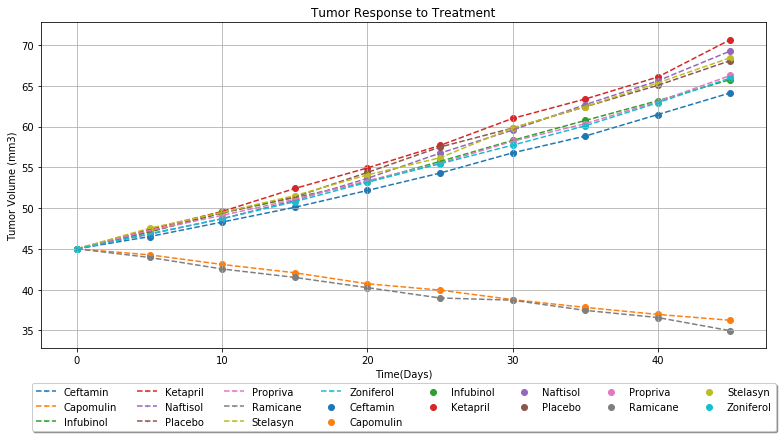

In [91]:
# graph includes all treatments

plt.figure(figsize = (13,6))

plt.scatter(x, y_ceftamin)
plt.plot(x, y_ceftamin, '--o',markersize = 0.5)

plt.scatter(x, y_campomulin)
plt.plot(x, y_campomulin, '--o', markersize = 0.5)

plt.scatter(x, y_infubinol)
plt.plot(x, y_infubinol, '--o', markersize = 0.5)

plt.scatter(x, y_ketapril)
plt.plot(x, y_ketapril, '--o', markersize = 0.5)

plt.scatter(x, y_naftisol)
plt.plot(x, y_naftisol, '--o', markersize = 0.5)

plt.scatter(x, y_placebo)
plt.plot(x, y_placebo, '--o', markersize = 0.5)

plt.scatter(x, y_propriva)
plt.plot(x, y_propriva, '--o', markersize = 0.5)

plt.scatter(x, y_ramicane)
plt.plot(x, y_ramicane, '--o', markersize = 0.5)

plt.scatter(x, y_stelasyn)
plt.plot(x, y_stelasyn, '--o', markersize = 0.5)

plt.scatter(x, y_zoniferol)
plt.plot(x, y_zoniferol, '--o', markersize = 0.5)

plt.grid()
plt.xlabel('Time(Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
# plt.legend(loc ='upper center', bbox_to_anchor = (0.4, 1.02), ncol = 5, \
#            fancybox=True, shadow = True)
plt.legend(loc ='upper center', bbox_to_anchor = (0.5, -0.09), ncol = 8, \
           fancybox=True, shadow = True)

plt.show()

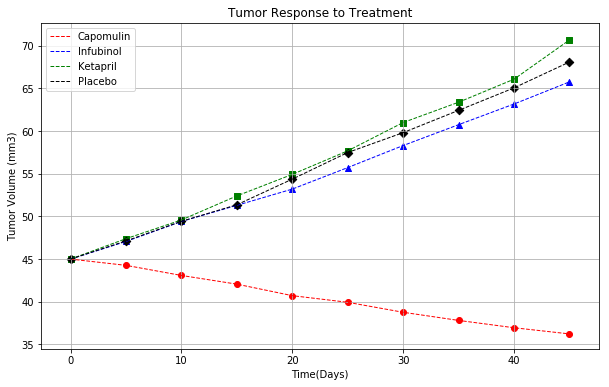

In [133]:
# graph includes 4 main treatments
plt.figure(figsize = (10,6))

plt.scatter(x, y_campomulin, marker = 'o', color = 'r')
plt.plot(x, y_campomulin, '--r', markersize = 0.5, linewidth = 1)


plt.scatter(x, y_infubinol,marker = '^', color = 'b')
plt.plot(x, y_infubinol, '--b', markersize = 0.5, linewidth = 1)

plt.scatter(x, y_ketapril, marker = 's', color='g')
plt.plot(x, y_ketapril, '--g', markersize = 0.5, linewidth = 1)

plt.scatter(x, y_placebo, marker = 'D', color = 'black')
plt.plot(x, y_placebo, '--' , color = 'black', markersize = 0.5, linewidth = 1)

plt.grid()
plt.xlabel('Time(Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.legend(drugs_selected, loc ='best')
plt.savefig('TumorResponse.png')
plt.show()

In [93]:
vol_se_transposed = vol_se.transpose()
vol_se_transposed

0          1          2          3          4   \
Drug                Capomulin  Capomulin  Capomulin  Capomulin  Capomulin   
Timepoint                   0          5         10         15         20   
Tumor Volume (mm3)      0.00%     44.86%     70.27%     83.86%     90.97%   

                           5          6          7          8          9   \
Drug                Capomulin  Capomulin  Capomulin  Capomulin  Capomulin   
Timepoint                  25         30         35         40         45   
Tumor Volume (mm3)     88.16%     93.45%    105.22%    122.36%    122.40%   

                      ...             90         91         92         93  \
Drug                  ...      Zoniferol  Zoniferol  Zoniferol  Zoniferol   
Timepoint             ...              0          5         10         15   
Tumor Volume (mm3)    ...          0.00%     18.90%     26.39%     37.05%   

                           94         95         96         97         98  \
Drug                Zoniferol  Zoniferol  Zoniferol  Zoniferol  Zoniferol   
Timepoint                  20         25         30         35         40   
Tumor Volume (mm3)     53.32%     60.25%     80.00%     88.14%     99.85%   

                           99  
Drug                Zoniferol  
Timepoint                  45  
Tumor Volume (mm3)    100.36%  

[3 rows x 100 columns]

In [94]:
vol_se_matrix = vol_se.pivot('Drug', 'Timepoint', 'Tumor Volume (mm3)').fillna(0).astype(float).values
vol_se_matrix = pd.DataFrame(vol_se_matrix)
vol_se_matrix = vol_se_matrix.transpose()
vol_se_matrix = pd.DataFrame(vol_se_matrix.values, columns = list(drugs))


In [95]:
vol_se_matrix.index = vol_se_matrix.index *5
vol_se_matrix.index

RangeIndex(start=0, stop=50, step=5)

In [96]:
vol_se_matrix

Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  Propriva  \
0       0.00%     0.00%      0.00%     0.00%     0.00%    0.00%     0.00%   
5      44.86%    16.45%     23.51%    26.48%    20.24%   21.81%    23.17%   
10     70.27%    23.61%     28.23%    35.74%    31.94%   40.21%    37.62%   
15     83.86%    33.21%     35.77%    58.03%    44.44%   61.45%    46.61%   
20     90.97%    35.95%     47.62%    72.65%    59.53%   83.96%    55.52%   
25     88.16%    43.94%     55.03%    75.54%    81.37%  103.49%    57.74%   
30     93.45%    49.06%     63.11%    93.41%    97.55%  121.82%    74.60%   
35    105.22%    69.22%     98.42%   112.79%   101.38%  128.75%   108.49%   
40    122.36%    70.85%    105.52%   115.84%   111.86%  137.06%   156.48%   
45    122.40%    90.24%    114.44%   145.32%   141.64%  135.17%   188.86%   

    Ramicane  Stelasyn  Zoniferol  
0      0.00%     0.00%      0.00%  
5     48.30%    23.99%     18.90%  
10    72.02%    43.37%     26.39%  
15    77.04%    49.33%     37.05%  
20    78.62%    62.19%     53.32%  
25    74.70%    74.19%     60.25%  
30    86.49%    89.95%     80.00%  
35    96.74%   100.32%     88.14%  
40   112.84%   141.04%     99.85%  
45   122.68%   157.66%    100.36%

In [97]:
# group combined datasets by drug and timepoint, calculate means of met. site data
drug_timepoint_met = combined.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
met_mean = drug_timepoint_met.reset_index()
met_mean.head()

Drug  Timepoint  Metastatic Sites
0  Capomulin          0             0.00%
1  Capomulin          5            16.00%
2  Capomulin         10            32.00%
3  Capomulin         15            37.50%
4  Capomulin         20            65.22%

In [98]:
# group combined datasets by drug and timepoint, calculate se of met. site data
drug_timepoint_se = combined.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
met_se = drug_timepoint_se.reset_index()
met_se.head()

Drug  Timepoint  Metastatic Sites
0  Capomulin          0             0.00%
1  Capomulin          5             7.48%
2  Capomulin         10            12.54%
3  Capomulin         15            13.20%
4  Capomulin         20            16.16%

In [99]:
met_mean_transposed = met_mean.transpose()
met_mean_transposed

0          1          2          3          4   \
Drug              Capomulin  Capomulin  Capomulin  Capomulin  Capomulin   
Timepoint                 0          5         10         15         20   
Metastatic Sites      0.00%     16.00%     32.00%     37.50%     65.22%   

                         5          6          7          8          9   \
Drug              Capomulin  Capomulin  Capomulin  Capomulin  Capomulin   
Timepoint                25         30         35         40         45   
Metastatic Sites     81.82%    109.09%    118.18%    138.10%    147.62%   

                    ...             90         91         92         93  \
Drug                ...      Zoniferol  Zoniferol  Zoniferol  Zoniferol   
Timepoint           ...              0          5         10         15   
Metastatic Sites    ...          0.00%     16.67%     50.00%     80.95%   

                         94         95         96         97         98  \
Drug              Zoniferol  Zoniferol  Zoniferol  Zoniferol  Zoniferol   
Timepoint                20         25         30         35         40   
Metastatic Sites    129.41%    168.75%    193.33%    228.57%    278.57%   

                         99  
Drug              Zoniferol  
Timepoint                45  
Metastatic Sites    307.14%  

[3 rows x 100 columns]

In [100]:
met_mean_matrix = met_mean.pivot('Drug', 'Timepoint', 'Metastatic Sites').fillna(0).astype(float).values
met_mean_matrix = pd.DataFrame(met_mean_matrix)
met_mean_matrix = met_mean_matrix.transpose()
met_mean_matrix = pd.DataFrame(met_mean_matrix.values, columns = list(drugs))


In [101]:
met_mean_matrix.index = met_mean_matrix.index *5
met_mean_matrix.index

RangeIndex(start=0, stop=50, step=5)

In [102]:
met_mean_matrix

Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  Propriva  \
0       0.00%     0.00%      0.00%     0.00%     0.00%    0.00%     0.00%   
5      16.00%    38.10%     28.00%    30.43%    26.09%   37.50%    32.00%   
10     32.00%    60.00%     66.67%    59.09%    52.38%   83.33%    56.52%   
15     37.50%    78.95%     90.48%    84.21%    85.71%  125.00%    76.47%   
20     65.22%   111.11%    105.00%   121.05%   115.00%  152.63%   100.00%   
25     81.82%   150.00%    127.78%   163.16%   150.00%  194.12%   135.71%   
30    109.09%   193.75%    158.82%   205.56%   206.67%  226.67%   161.54%   
35    118.18%   207.14%    166.67%   229.41%   226.67%  264.29%   230.00%   
40    138.10%   235.71%    210.00%   273.33%   246.67%  316.67%   277.78%   
45    147.62%   269.23%    211.11%   336.36%   253.85%  327.27%   257.14%   

    Ramicane  Stelasyn  Zoniferol  
0      0.00%     0.00%      0.00%  
5     12.00%    24.00%     16.67%  
10    25.00%    47.83%     50.00%  
15    33.33%    78.26%     80.95%  
20    34.78%    95.24%    129.41%  
25    65.22%   115.79%    168.75%  
30    78.26%   138.89%    193.33%  
35    95.24%   156.25%    228.57%  
40   110.00%   158.33%    278.57%  
45   125.00%   172.73%    307.14%

In [103]:
y_met_campomulin = met_mean_matrix['Capomulin']
y_met_ceftamin = met_mean_matrix['Ceftamin']
y_met_infubinol = met_mean_matrix['Infubinol']
y_met_ketapril = met_mean_matrix['Ketapril']
y_met_naftisol = met_mean_matrix['Naftisol']
y_met_placebo = met_mean_matrix['Placebo']
y_met_propriva = met_mean_matrix['Propriva']
y_met_ramicane = met_mean_matrix['Ramicane']
y_met_stelasyn = met_mean_matrix['Stelasyn']
y_met_zoniferol = met_mean_matrix['Zoniferol']

In [104]:
met_se_transposed = met_se.transpose()
met_se_transposed

0          1          2          3          4   \
Drug              Capomulin  Capomulin  Capomulin  Capomulin  Capomulin   
Timepoint                 0          5         10         15         20   
Metastatic Sites      0.00%      7.48%     12.54%     13.20%     16.16%   

                         5          6          7          8          9   \
Drug              Capomulin  Capomulin  Capomulin  Capomulin  Capomulin   
Timepoint                25         30         35         40         45   
Metastatic Sites     18.18%     17.29%     16.95%     17.56%     20.26%   

                    ...             90         91         92         93  \
Drug                ...      Zoniferol  Zoniferol  Zoniferol  Zoniferol   
Timepoint           ...              0          5         10         15   
Metastatic Sites    ...          0.00%      7.77%     10.91%     11.17%   

                         94         95         96         97         98  \
Drug              Zoniferol  Zoniferol  Zoniferol  Zoniferol  Zoniferol   
Timepoint                20         25         30         35         40   
Metastatic Sites     16.64%     23.66%     24.82%     28.57%     29.98%   

                         99  
Drug              Zoniferol  
Timepoint                45  
Metastatic Sites     28.64%  

[3 rows x 100 columns]

In [105]:
met_se_matrix = met_se.pivot('Drug', 'Timepoint', 'Metastatic Sites').fillna(0).astype(float).values
met_se_matrix = pd.DataFrame(met_se_matrix)
met_se_matrix = met_se_matrix.transpose()
met_se_matrix = pd.DataFrame(met_se_matrix.values, columns = list(drugs))


In [106]:
met_se_matrix.index = met_se_matrix.index *5
met_se_matrix.index

RangeIndex(start=0, stop=50, step=5)

In [107]:
met_se_matrix

Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  Propriva  \
0       0.00%     0.00%      0.00%     0.00%     0.00%    0.00%     0.00%   
5       7.48%    10.86%      9.17%     9.81%     9.36%   10.09%     9.52%   
10     12.54%    15.22%     15.94%    14.20%    16.36%   11.53%    10.57%   
15     13.20%    18.06%     19.40%    19.14%    15.87%   19.02%    13.64%   
20     16.16%    24.10%     23.48%    23.67%    18.17%   23.41%    17.15%   
25     18.18%    25.88%     26.58%    28.83%    18.52%   26.39%    19.91%   
30     17.29%    24.95%     22.78%    34.75%    26.67%   30.03%    26.65%   
35     16.95%    26.65%     22.47%    36.14%    33.05%   34.14%    36.67%   
40     17.56%    28.91%     31.45%    31.57%    32.17%   29.73%    43.39%   
45     20.26%    28.61%     30.93%    27.87%    35.11%   30.42%    42.86%   

    Ramicane  Stelasyn  Zoniferol  
0      0.00%     0.00%      0.00%  
5      6.63%     8.72%      7.77%  
10     9.03%    12.37%     10.91%  
15    11.53%    15.34%     11.17%  
20    11.94%    20.09%     16.64%  
25    11.94%    21.98%     23.66%  
30    14.00%    23.06%     24.82%  
35    14.60%    24.10%     28.57%  
40    16.06%    31.28%     29.98%  
45    19.02%    35.91%     28.64%

In [108]:
y_se_campomulin = met_se_matrix['Capomulin']
y_se_ceftamin = met_se_matrix['Ceftamin']
y_se_infubinol = met_se_matrix['Infubinol']
y_se_ketapril = met_se_matrix['Ketapril']
y_se_naftisol = met_se_matrix['Naftisol']
y_se_placebo = met_se_matrix['Placebo']
y_se_propriva = met_se_matrix['Propriva']
y_se_ramicane = met_se_matrix['Ramicane']
y_se_stelasyn = met_se_matrix['Stelasyn']
y_se_zoniferol = met_se_matrix['Zoniferol']

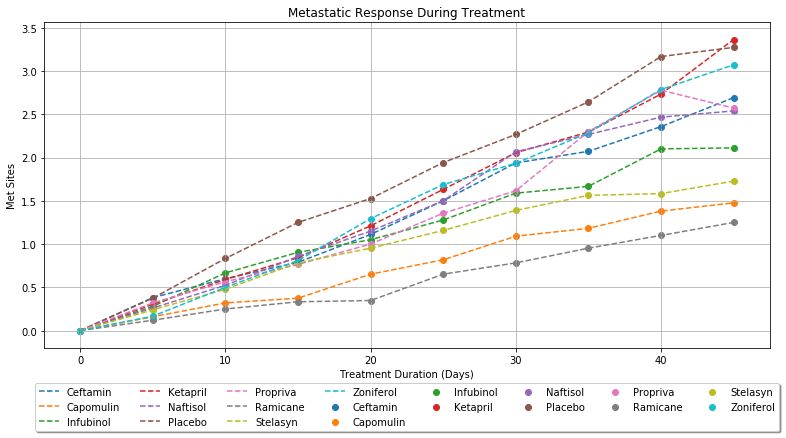

In [109]:
# graph includes all treatments

plt.figure(figsize = (13,6))

plt.scatter(x, y_met_ceftamin)
plt.plot(x, y_met_ceftamin, '--o',markersize = 0.5)

plt.scatter(x, y_met_campomulin)
plt.plot(x, y_met_campomulin, '--o', markersize = 0.5)

plt.scatter(x, y_met_infubinol)
plt.plot(x, y_met_infubinol, '--o', markersize = 0.5)

plt.scatter(x, y_met_ketapril)
plt.plot(x, y_met_ketapril, '--o', markersize = 0.5)

plt.scatter(x, y_met_naftisol)
plt.plot(x, y_met_naftisol, '--o', markersize = 0.5)

plt.scatter(x, y_met_placebo)
plt.plot(x, y_met_placebo, '--o', markersize = 0.5)

plt.scatter(x, y_met_propriva)
plt.plot(x, y_met_propriva, '--o', markersize = 0.5)

plt.scatter(x, y_met_ramicane)
plt.plot(x, y_met_ramicane, '--o', markersize = 0.5)

plt.scatter(x, y_met_stelasyn)
plt.plot(x, y_met_stelasyn, '--o', markersize = 0.5)

plt.scatter(x, y_met_zoniferol)
plt.plot(x, y_met_zoniferol, '--o', markersize = 0.5)

plt.grid()
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met Sites')
plt.title('Metastatic Response During Treatment')
# plt.legend(loc ='upper center', bbox_to_anchor = (0.4, 1.02), ncol = 5, \
#            fancybox=True, shadow = True)
plt.legend(loc ='upper center', bbox_to_anchor = (0.5, -0.09), ncol = 8, \
           fancybox=True, shadow = True)

plt.show()

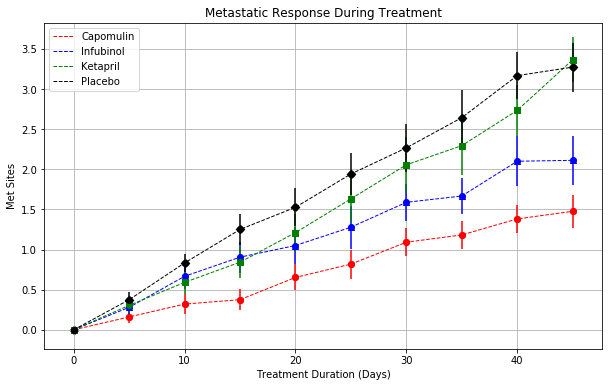

In [134]:
# graph includes 4 main treatments
plt.figure(figsize = (10,6))

plt.scatter(x, y_met_campomulin, marker = 'o', color = 'r')
plt.plot(x, y_met_campomulin, '--r', markersize = 0.5, linewidth = 1)
plt.errorbar(x, y_met_campomulin, yerr = y_se_campomulin, fmt = 'o', color ='r' )

plt.scatter(x, y_met_infubinol,marker = '^', color = 'b')
plt.plot(x, y_met_infubinol, '--b', markersize = 0.5, linewidth = 1)
plt.errorbar(x, y_met_infubinol, yerr = y_se_infubinol, fmt = 'o', color ='b' )

plt.scatter(x, y_met_ketapril, marker = 's', color='g')
plt.plot(x, y_met_ketapril, '--g', markersize = 0.5, linewidth = 1)
plt.errorbar(x, y_met_ketapril, yerr = y_se_ketapril, fmt = 'o', color ='g' )

plt.scatter(x, y_met_placebo, marker = 'D', color = 'black')
plt.plot(x, y_met_placebo, '--' , color = 'black', markersize = 0.5, linewidth = 1)
plt.errorbar(x, y_met_placebo, yerr = y_se_placebo, fmt = 'o', color ='black' )

plt.grid()
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met Sites')
plt.title('Metastatic Response During Treatment')
plt.legend(drugs_selected, loc ='best')
plt.savefig('MetResponse.png')
plt.show()

In [111]:
# calculate count of mouse
mouse_count = combined.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
mouse_count = mouse_count.reset_index()
mouse_count.head()

Drug  Timepoint  Mouse ID
0  Capomulin          0        25
1  Capomulin          5        25
2  Capomulin         10        25
3  Capomulin         15        24
4  Capomulin         20        23

In [112]:
mouse_count_transposed = mouse_count.transpose()
mouse_count_transposed

0          1          2          3          4          5   \
Drug       Capomulin  Capomulin  Capomulin  Capomulin  Capomulin  Capomulin   
Timepoint          0          5         10         15         20         25   
Mouse ID          25         25         25         24         23         22   

                  6          7          8          9     ...             90  \
Drug       Capomulin  Capomulin  Capomulin  Capomulin    ...      Zoniferol   
Timepoint         30         35         40         45    ...              0   
Mouse ID          22         22         21         21    ...             25   

                  91         92         93         94         95         96  \
Drug       Zoniferol  Zoniferol  Zoniferol  Zoniferol  Zoniferol  Zoniferol   
Timepoint          5         10         15         20         25         30   
Mouse ID          24         22         21         17         16         15   

                  97         98         99  
Drug       Zoniferol  Zoniferol  Zoniferol  
Timepoint         35         40         45  
Mouse ID          14         14         14  

[3 rows x 100 columns]

In [113]:
mouse_count_matrix = mouse_count.pivot('Drug', 'Timepoint', 'Mouse ID').fillna(0).astype(int).values
mouse_count_matrix = pd.DataFrame(mouse_count_matrix)
mouse_count_matrix = mouse_count_matrix.transpose()
mouse_count_matrix = pd.DataFrame(mouse_count_matrix.values, columns = list(drugs))


In [114]:
mouse_count_matrix.index = mouse_count_matrix.index *5
mouse_count_matrix.index

RangeIndex(start=0, stop=50, step=5)

In [115]:
mouse_count_matrix

Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  Propriva  \
0          25        25         25        25        25       25        26   
5          25        21         25        23        23       24        25   
10         25        20         21        22        21       24        23   
15         24        19         21        19        21       20        17   
20         23        18         20        19        20       19        17   
25         22        18         18        19        18       17        14   
30         22        16         17        18        15       15        13   
35         22        14         12        17        15       14        10   
40         21        14         10        15        15       12         9   
45         21        13          9        11        13       11         7   

    Ramicane  Stelasyn  Zoniferol  
0         25        26         25  
5         25        25         24  
10        24        23         22  
15        24        23         21  
20        23        21         17  
25        23        19         16  
30        23        18         15  
35        21        16         14  
40        20        12         14  
45        20        11         14

In [116]:
y_mc_campomulin = mouse_count_matrix['Capomulin']
y_mc_ceftamin = mouse_count_matrix['Ceftamin']
y_mc_infubinol = mouse_count_matrix['Infubinol']
y_mc_ketapril = mouse_count_matrix['Ketapril']
y_mc_naftisol = mouse_count_matrix['Naftisol']
y_mc_placebo = mouse_count_matrix['Placebo']
y_mc_propriva = mouse_count_matrix['Propriva']
y_mc_ramicane = mouse_count_matrix['Ramicane']
y_mc_stelasyn = mouse_count_matrix['Stelasyn']
y_mc_zoniferol = mouse_count_matrix['Zoniferol']

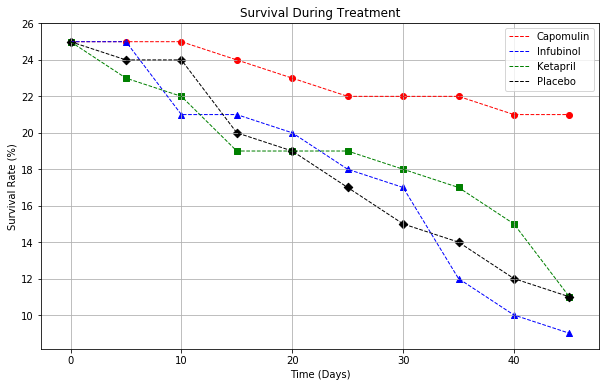

In [135]:
# graph includes 4 main treatments
plt.figure(figsize = (10,6))

plt.scatter(x, y_mc_campomulin, marker = 'o', color = 'r')
plt.plot(x, y_mc_campomulin, '--r', markersize = 0.5, linewidth = 1)

plt.scatter(x, y_mc_infubinol,marker = '^', color = 'b')
plt.plot(x, y_mc_infubinol, '--b', markersize = 0.5, linewidth = 1)

plt.scatter(x, y_mc_ketapril, marker = 's', color='g')
plt.plot(x, y_mc_ketapril, '--g', markersize = 0.5, linewidth = 1)

plt.scatter(x, y_mc_placebo, marker = 'D', color = 'black')
plt.plot(x, y_mc_placebo, '--' , color = 'black', markersize = 0.5, linewidth = 1)

plt.grid()
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Treatment')
plt.legend(drugs_selected, loc ='best')
plt.savefig('SurvivalRate.png')
plt.show()

In [118]:
# store changes in a tuple
tumor_changes = (y_campomulin_change,y_ceftamin_change,y_infubinol_change,\
                 y_ketapril_change, y_naftisol_change, y_placebo_change,\
                 y_propriva_change,y_ramicane_change, y_stelasyn_change,\
                 y_zoniferol_change)

# tumor_changes = sorted(tumor_changes, key = lambda tup:tup)


In [119]:
# changes drugs from tuple to series
drugs = pd.Series(drugs)
drugs

0    Capomulin
1     Ceftamin
2    Infubinol
3     Ketapril
4     Naftisol
5      Placebo
6     Propriva
7     Ramicane
8     Stelasyn
9    Zoniferol
dtype: object

In [120]:
# changes tumor_changes from tuple to series
tumor_changes = pd.Series(tumor_changes)
tumor_changes

0   -19.48%
1    42.52%
2    46.12%
3    57.03%
4    53.92%
5    51.30%
6    47.24%
7   -22.32%
8    52.09%
9    46.58%
dtype: float64

In [121]:
drug_tumor_changes = pd.DataFrame({'x': drugs, 'y': tumor_changes})
drug_tumor_changes

x       y
0  Capomulin -19.48%
1   Ceftamin  42.52%
2  Infubinol  46.12%
3   Ketapril  57.03%
4   Naftisol  53.92%
5    Placebo  51.30%
6   Propriva  47.24%
7   Ramicane -22.32%
8   Stelasyn  52.09%
9  Zoniferol  46.58%

In [122]:
drugs_selected = drugs.loc[[0,2,3,5]]
drugs_selected

0    Capomulin
2    Infubinol
3     Ketapril
5      Placebo
dtype: object

In [123]:
tumor_changes_selected = tumor_changes.loc[[0,2,3,5]]
tumor_changes_selected

0   -19.48%
2    46.12%
3    57.03%
5    51.30%
dtype: float64

In [124]:
pd.options.display.float_format = '{:,.2%}'.format

# tumor_changes_selected = '{:.2f%'}'.format(tumor_changes_selected)
tumor_changes_selected

0   -19.48%
2    46.12%
3    57.03%
5    51.30%
dtype: float64

In [125]:
drugs_df = pd.DataFrame({'drugs_selected': drugs_selected, \
                         'tumor_changes_selected':tumor_changes_selected})
drugs_df

drugs_selected  tumor_changes_selected
0      Capomulin                 -19.48%
2      Infubinol                  46.12%
3       Ketapril                  57.03%
5        Placebo                  51.30%

In [126]:
# check if cells are positive/negative
drugs_df['positive'] = drugs_df['tumor_changes_selected'] >=0
drugs_df = drugs_df.reset_index(drop = True)
drugs_df

drugs_selected  tumor_changes_selected  positive
0      Capomulin                 -19.48%     False
1      Infubinol                  46.12%      True
2       Ketapril                  57.03%      True
3        Placebo                  51.30%      True

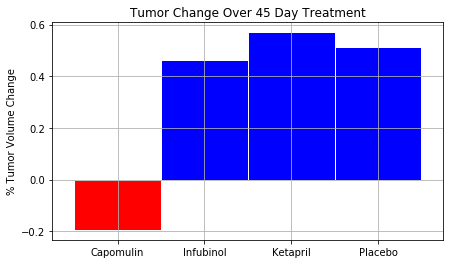

In [151]:
plt.figure(figsize = (7,4))

drugs_df['tumor_changes_selected'].plot(kind = 'bar', \
        color = drugs_df.positive.map({True: 'b', False: 'r'}),\
                                    width = 1,edgecolor = 'white')
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment')

tick_loc = [-0.20, 0, 0.20, 0.40, 0.60]
xtick_loc = [0, 1, 2, 3]
plt.xticks(xtick_loc, drugs_selected, rotation = 'horizontal')
plt.yticks(tick_loc)
plt.grid()

plt.savefig('TumorChanges.png')
plt.show()
